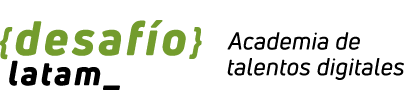

#<center><font color='green'>Regresión logística</font></center>

Veremos ahora cómo implementar un modelo de regresión logística para una base de datos, buscando relacionar algunas características de pacientes con su diagnóstico.

Para esto, cargaremos las bibliotecas necesarias y la data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score,confusion_matrix, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc


df=pd.read_csv('breast cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Preparamos los datos. Para ello podríamos hacer un análisis exploratorio de los mismos, en n uestro caso solo eliminaremos una columna con valores nulos.

In [ ]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [ ]:
variables=df.columns
print(variables)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


##<font color='green'>Nuestro modelo de regresión</font>

Vamos a escoger algunas variables de nuestra base de datos y aplicaremos el modelo de regresión logística.

In [ ]:
X = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']]
y = df['diagnosis']

# Mapear las etiquetas 'M' (maligno) a 1 y 'B' (benigno) a 0
y = y.map({'M': 1, 'B': 0})

# Crea una instancia del modelo de regresión logística
model = LogisticRegression()

# Ajusta el modelo a los datos
model.fit(X, y)

# Realiza predicciones con el modelo
y_pred = model.predict(X)

# Calcula la precisión del modelo
accuracy = accuracy_score(y, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Calcula y muestra la matriz de confusión
confusion = confusion_matrix(y, y_pred)
print('Matriz de Confusión:')
print(confusion)

# Genera un informe de clasificación que incluye precisión, recuperación y F1-score
report = classification_report(y, y_pred)
print('Informe de Clasificación:')
print(report)

Precisión del modelo: 0.9121265377855887
Matriz de Confusión:
[[337  20]
 [ 30 182]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       357
           1       0.90      0.86      0.88       212

    accuracy                           0.91       569
   macro avg       0.91      0.90      0.91       569
weighted avg       0.91      0.91      0.91       569



##<font color='green'>Evaluando el modelo</font>

Calcularemos ahora las métricas de evaluación para nuestro modelo.

AUC-ROC: 0.9724380318165002
AUC-PR: 0.9613590912834901


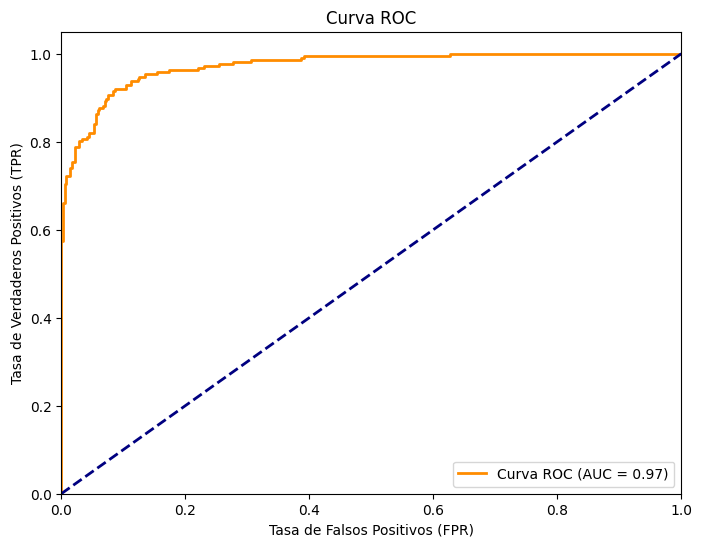

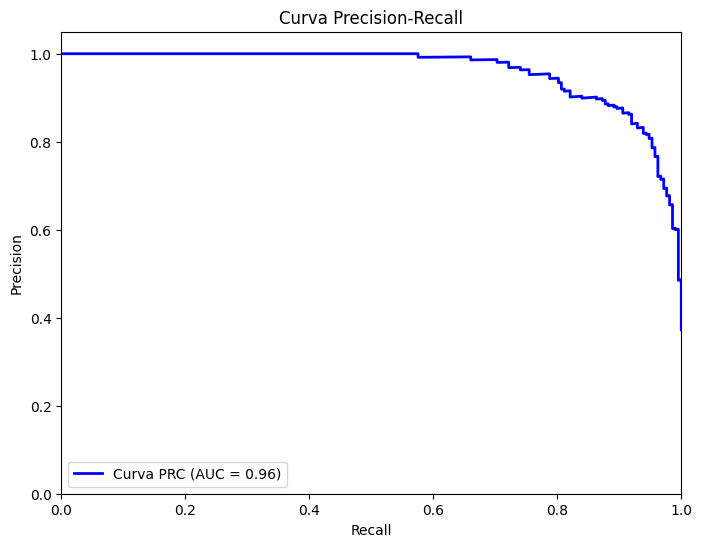

In [ ]:
# Obtener las probabilidades de predicción
y_prob = model.predict_proba(X)[:, 1]

# Calcular el AUC-ROC
roc_auc = roc_auc_score(y, y_prob)
print(f'AUC-ROC: {roc_auc}')

# Calcular el AUC-PR
prc_auc = average_precision_score(y, y_prob)
print(f'AUC-PR: {prc_auc}')

# Calcular la curva ROC
fpr, tpr, thresholds_roc = roc_curve(y, y_prob)

# Calcular la curva PRC
precision, recall, thresholds_prc = precision_recall_curve(y, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')

# Graficar la curva PRC
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Curva PRC (AUC = %0.2f)' % prc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')

# Mostrar las curvas ROC y PRC
plt.show()

##<font color='green'> Desbalanceo de clases

Veremos a continuación un ejemplo de clases desbalanceadas y el efecto que esto provoca en el modelo de regresión logistica.

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder

# Cargamos los datos
df=pd.read_csv('creditcard.csv')
# Eliminamos Duplicados
df.drop_duplicates(inplace=True)


# Eliminamos Nulos, y los datos "Time" y "Amount" por no estar correctamente codificadas
df=df.dropna()
df=df.drop(['Time','Amount'] , axis = 1)
col=df.columns.to_list()

# Es necesario escalar
sc=StandardScaler()

# Identifiquemos las variables X e y
X=df.drop('Class', axis = 1)
Y=df['Class']
X=sc.fit_transform(X)
print(df['Class'].value_counts())


0    283253
1       473
Name: Class, dtype: int64


Es evidente que la clase 0 tiene muchos más casos que la clase 1. Veamos qué ocurre si ignoramos este hecho y si utilizamos SMOTE para corregir este hecho.

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score
from imblearn.over_sampling import SMOTE

X = df.drop(columns=["Class"]).values

# Variable dependiente
y = df["Class"].values

# Estandarizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modelo de Regresión Logística sin SMOTE
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X, y)

# Realizar predicciones en el conjunto de datos sin SMOTE
y_pred = logistic_regression_model.predict(X)

# Calcular AUC-ROC sin SMOTE
roc_auc = roc_auc_score(y, y_pred)

# Calcular AUC-PR sin SMOTE
average_precision = average_precision_score(y, y_pred)

# Ahora, aplicaremos SMOTE y crearemos el modelo nuevamente
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Modelo de Regresión Logística con SMOTE
logistic_regression_model_smote = LogisticRegression(random_state=42)
logistic_regression_model_smote.fit(X_resampled, y_resampled)

# Realizar predicciones en el conjunto de datos con SMOTE
y_pred_smote = logistic_regression_model_smote.predict(X)

# Calcular AUC-ROC con SMOTE
roc_auc_smote = roc_auc_score(y, y_pred_smote)

# Calcular AUC-PR con SMOTE
average_precision_smote = average_precision_score(y, y_pred_smote)

# Imprimir AUC-ROC y AUC-PR para ambos modelos
print("AUC-ROC sin SMOTE:", roc_auc)
print("AUC-PR sin SMOTE:", average_precision)
print("AUC-ROC con SMOTE:", roc_auc_smote)
print("AUC-PR con SMOTE:", average_precision_smote)

AUC-ROC Without SMOTE: 0.8043656076326599
AUC-PR Without SMOTE: 0.5320377765258981
AUC-ROC With SMOTE: 0.9435459013255313
AUC-PR With SMOTE: 0.05033581857794466


Un aumento en el AUC-ROC con SMOTE es común, ya que SMOTE mejora la separación entre las clases, pero una disminución en el AUC-PR puede ocurrir debido a la introducción de ejemplos sintéticos que pueden no ser ideales para la clasificación precisa de la clase minoritaria. La elección de qué métrica es más importante depende del contexto de tu problema. Si la precisión en la detección de la clase minoritaria es crucial, entonces debes prestar más atención al AUC-PR y considerar ajustes adicionales en el modelo o en la técnica de muestreo.

<center><strong>¡Ahora podemos regresar a nuestra presentación</strong></center>